In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./Data/creditcard.csv')
df.shape

(284807, 31)

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 분포 확인

(0.0, 172792.0)

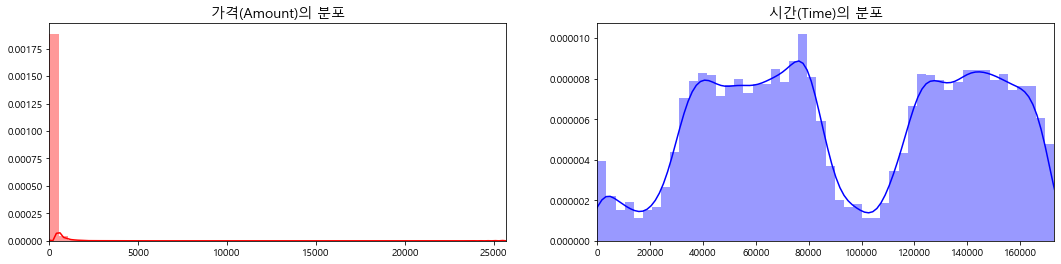

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sb.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('가격(Amount)의 분포', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sb.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('시간(Time)의 분포', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# 가격, 시간 전처리
## StandardScaler, RoubustScaler, Log Transformation

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

df_copy = df.copy()

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

log_amount = np.log1p(df_copy['Amount'])
std_amount = std_scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
rob_amount = rob_scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))

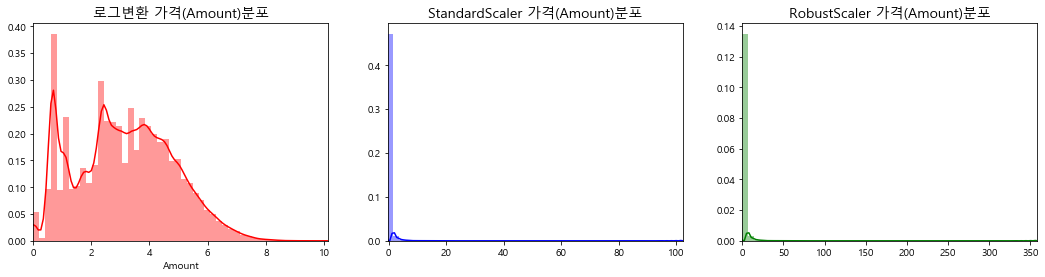

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

sb.distplot(log_amount, ax=ax[0], color='r')
ax[0].set_title('로그변환 가격(Amount)분포', fontsize=14)
ax[0].set_xlim([min(log_amount), max(log_amount)])

sb.distplot(std_amount, ax=ax[1], color='b')
ax[1].set_title('StandardScaler 가격(Amount)분포', fontsize=14)
ax[1].set_xlim([min(std_amount), max(std_amount)])

sb.distplot(rob_amount, ax=ax[2], color='g')
ax[2].set_title('RobustScaler 가격(Amount)분포', fontsize=14)
ax[2].set_xlim([min(rob_amount), max(rob_amount)])

plt.show()

In [6]:
log_time = np.log1p(df_copy['Time'])
std_time = std_scaler.fit_transform(df_copy['Time'].values.reshape(-1,1))
rob_time = rob_scaler.fit_transform(df_copy['Time'].values.reshape(-1,1))

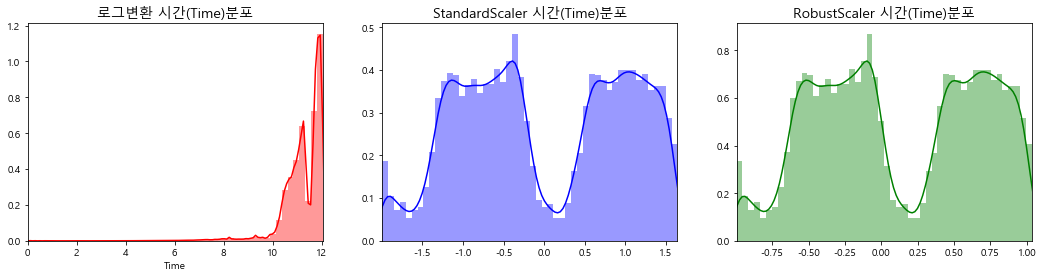

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

sb.distplot(log_time, ax=ax[0], color='r')
ax[0].set_title('로그변환 시간(Time)분포', fontsize=14)
ax[0].set_xlim([min(log_time), max(log_time)])

sb.distplot(std_time, ax=ax[1], color='b')
ax[1].set_title('StandardScaler 시간(Time)분포', fontsize=14)
ax[1].set_xlim([min(std_time), max(std_time)])

sb.distplot(rob_time, ax=ax[2], color='g')
ax[2].set_title('RobustScaler 시간(Time)분포', fontsize=14)
ax[2].set_xlim([min(rob_time), max(rob_time)])

plt.show()

In [8]:
df_std = df_copy.copy()
df_std.insert(0, 'Scaled_Amount', std_amount)
df_std.insert(1, 'Scaled_Time', std_time)
df_std.drop(['Time', 'Amount'], axis=1, inplace=True)

In [9]:
df_rob = df_copy.copy()
df_rob.insert(0, 'Scaled_Amount', rob_amount)
df_rob.insert(1, 'Scaled_Time', rob_time)
df_rob.drop(['Time', 'Amount'], axis=1, inplace=True)

In [10]:
df_log = df_copy.copy()
df_log.insert(0, 'Scaled_Amount', log_amount)
df_log.insert(1, 'Scaled_Time', log_time)
df_log.drop(['Time', 'Amount'], axis=1, inplace=True)

# 데이터 섞어서 테스트하기 (교차검증 KFold)
## KFold, Stratifiedkfold

In [33]:
from sklearn.model_selection import StratifiedKFold


def split_kfold():
    sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    return sss

# ReSampling
## Under-Sampling

In [62]:

def under_sample(df):

    df = df.sample(frac=1)

    # amount of fraud classes 492 rows.
    fraud_df = df_copy.loc[df['Class'] == 1]
    non_fraud_df = df_copy.loc[df['Class'] == 0][:492]

    normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

    # Shuffle dataframe rows
    new_df = normal_distributed_df.sample(frac=1, random_state=42)
    
    return new_df

# 모델 설정
##

In [54]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

def train(model, feature_train, feature_test, label_train, label_test):
    model.fit(feature_train, label_train)
    pred = model.predict(feature_test)
    return evaluation(label_test, pred)

# 검증

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [79]:
def evaluation(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)   
    roc_auc = roc_auc_score(y_test,pred)
    return accuracy, precision, recall, f1, roc_auc

# 종합

In [91]:
def process(df, model):
    new_df = df.copy()
    X = new_df.iloc[:, :-1]
    y = new_df.iloc[:, -1]
    cv_acc, cv_pre, cv_rec, cv_f1, cv_roc_auc=[],[],[], [], []
    
    sss = split_kfold()
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #모델로 훈련시키기
        acc, pre, rec, f1, roc_auc = train(model, X_train, X_test, y_train, y_test)
        cv_acc.append(acc)
        cv_pre.append(pre)
        cv_rec.append(rec)
        cv_f1.append(f1)
        cv_roc_auc.append(roc_auc)
        
    print('정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}'.format(np.mean(cv_acc),np.mean(cv_pre),np.mean(cv_rec), np.mean(cv_f1), np.mean(cv_roc_auc) ))
    

In [93]:
lr = LogisticRegression()
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

In [94]:
#df_std
process(df_std, lr)
process(df_std,lgbm_clf)


정확도:0.9991, 정밀도: 0.8850, 재현율: 0.5992, f1: 0.6993, roc_auc: 0.7995
정확도:0.9994, 정밀도: 0.8580, 재현율: 0.7842, f1: 0.8103, roc_auc: 0.8920


In [84]:
#df_rob
process(df_rob,lr)
process(df_rob,lgbm_clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


정확도:0.9319, 정밀도: 0.9572, 재현율: 0.9044, f1: 0.9298, roc_auc: 0.9319
정확도:0.9471, 정밀도: 0.9682, 재현율: 0.9248, f1: 0.9460, roc_auc: 0.9471


In [85]:
#df_log
process(df_log,lr)
process(df_log, lgbm_clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


정확도:0.9319, 정밀도: 0.9572, 재현율: 0.9044, f1: 0.9298, roc_auc: 0.9319
정확도:0.9471, 정밀도: 0.9682, 재현율: 0.9248, f1: 0.9460, roc_auc: 0.9471


In [95]:
process(df, lr)
process(df, lgbm_clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

정확도:0.9958, 정밀도: 0.7250, 재현율: 0.6392, f1: 0.5600, roc_auc: 0.8178
정확도:0.9994, 정밀도: 0.8595, 재현율: 0.7802, f1: 0.8093, roc_auc: 0.8899


In [87]:
df_log

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,5.014760,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.305626,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,5.939276,0.693147,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,4.824306,0.693147,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,4.262539,1.098612,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.570980,12.059815,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,3.249987,12.059821,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,4.232366,12.059826,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,2.397895,12.059826,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0
